In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import gensim
from gensim import models
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

In [3]:
####### Notebook 3 imports ###########################
import pyLDAvis
import pyLDAvis.gensim

In [4]:
nltk.download(["punkt", "stopwords"])

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data_dir = "Text-Mining-main/data/NYT_article_data.csv"
df = pd.read_csv(data_dir)

In [6]:
print(df.columns)
reviews = list(df["snippet"])
print(reviews[:3])

Index(['web_url', 'headline', 'snippet', 'word_count', 'source',
       'type_of_material', 'date', 'id'],
      dtype='object')
['Nick Kyrgios started his Brisbane Open title defense with a battling 7-6(5) 5-7 7-6(5) victory over American Ryan Harrison in the opening round on Tuesday.', "British police confirmed on Tuesday they were treating a stabbing attack which injured three people at Manchester's Victoria train station as a terrorist investigation, and were searching an address in the Cheetham Hill area of the city.", 'Marcellus Wiley is still on the fence about letting his young son play football. But the former NFL defensive end and Fox Sports personality tells PodcastOne Sports Now that he likes what the NFL is doing to try and make football a safer game, des...']


In [7]:
nltk.download(["stopwords", "punkt"])
stopwords_list = stopwords.words("english")
print(stopwords_list[:5])

['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
processed_text = [
    [
        PorterStemmer().stem(word.lower())
        for word in word_tokenize(text)
        if not word.lower() in stopwords_list
        if word.isalpha()
    ]
    for text in reviews
]

print(processed_text[:5])

[['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday'], ['british', 'polic', 'confirm', 'tuesday', 'treat', 'stab', 'attack', 'injur', 'three', 'peopl', 'manchest', 'victoria', 'train', 'station', 'terrorist', 'investig', 'search', 'address', 'cheetham', 'hill', 'area', 'citi'], ['marcellu', 'wiley', 'still', 'fenc', 'let', 'young', 'son', 'play', 'footbal', 'former', 'nfl', 'defens', 'end', 'fox', 'sport', 'person', 'tell', 'podcaston', 'sport', 'like', 'nfl', 'tri', 'make', 'footbal', 'safer', 'game', 'de'], ['still', 'reckon', 'fallout', 'emmett', 'till', 'paint', 'chasten', 'artist', 'reveal', 'controversi', 'chang', 'even', 'move', 'forward', 'new', 'galleri', 'show'], ['far', 'arik', 'ogunbowal', 'coach', 'muffet', 'mcgraw', 'concern', 'notr', 'dame', 'victori', 'louisvil', 'thursday', 'night', 'anoth', 'atlant', 'coast', 'confer', 'game', 'januari']]


In [9]:
clean_data = [' '.join(text) for text in processed_text]
print(clean_data[:5])

['nick kyrgio start brisban open titl defens battl victori american ryan harrison open round tuesday', 'british polic confirm tuesday treat stab attack injur three peopl manchest victoria train station terrorist investig search address cheetham hill area citi', 'marcellu wiley still fenc let young son play footbal former nfl defens end fox sport person tell podcaston sport like nfl tri make footbal safer game de', 'still reckon fallout emmett till paint chasten artist reveal controversi chang even move forward new galleri show', 'far arik ogunbowal coach muffet mcgraw concern notr dame victori louisvil thursday night anoth atlant coast confer game januari']


In [10]:
word_count = [len(text.split()) for text in clean_data]
# print(len(word_count))
# print(len(set(word_count)))

In [11]:
print(word_count)

[15, 22, 27, 17, 19, 12, 5, 11, 23, 13, 15, 12, 13, 21, 19, 10, 14, 15, 12, 12, 21, 8, 18, 14, 8, 24, 11, 21, 15, 12, 15, 26, 17, 25, 17, 19, 11, 16, 16, 8, 22, 18, 19, 10, 15, 6, 20, 18, 11, 9, 24, 7, 12, 16, 24, 23, 22, 19, 13, 14, 13, 19, 22, 23, 23, 13, 7, 21, 21, 23, 6, 19, 23, 23, 12, 21, 26, 6, 7, 22, 19, 14, 25, 10, 19, 13, 22, 13, 19, 14, 25, 14, 11, 17, 20, 9, 24, 24, 16, 7, 8, 11, 26, 22, 20, 14, 15, 23, 8, 23, 23, 7, 12, 24, 15, 3, 9, 19, 14, 28, 19, 11, 21, 18, 24, 22, 4, 22, 19, 9, 10, 17, 17, 8, 24, 12, 20, 19, 15, 26, 15, 19, 23, 10, 22, 21, 22, 16, 16, 18, 22, 24, 16, 18, 22, 22, 6, 17, 7, 20, 28, 14, 24, 15, 23, 22, 17, 25, 11, 24, 21, 14, 20, 23, 20, 14, 16, 15, 8, 10, 15, 19, 14, 16, 5, 8, 9, 12, 23, 25, 20, 19, 9, 15, 20, 25, 23, 18, 22, 30, 22, 15, 14, 24, 21, 10, 7, 11, 13, 19, 19, 14, 13, 15, 20, 12, 16, 13, 12, 5, 24, 27, 10, 11, 10, 13, 22, 11, 19, 6, 21, 16, 13]


<Axes: xlabel='Number of words per document', ylabel='Frequency'>

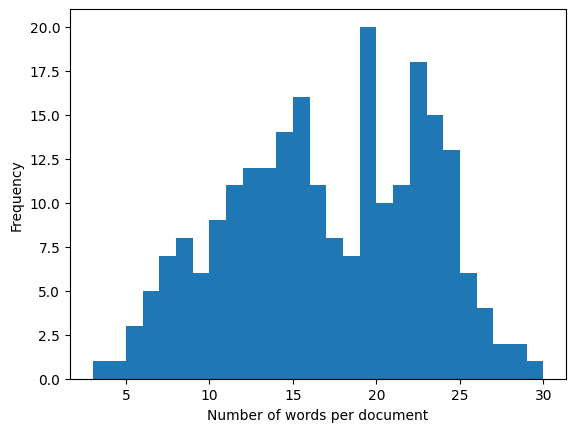

In [12]:
pd.Series(data=word_count).plot.hist(bins=len(set(word_count)),xlabel="Number of words per document", 
    ylabel="Frequency",)


In [13]:

# %pip install jupyterlab_vim

In [14]:
# %pip install nltk wordcloud "black[jupyter]"

In [15]:
a = pd.DataFrame(clean_data)
# print(a.isnull().sum())

a = "I love this movie"
a = word_tokenize(a)

In [16]:
# print(a)
# print(list(df["snippet"]))

In [17]:
word_count_array = np.array(word_count)
print(word_count_array)

[15 22 27 17 19 12  5 11 23 13 15 12 13 21 19 10 14 15 12 12 21  8 18 14
  8 24 11 21 15 12 15 26 17 25 17 19 11 16 16  8 22 18 19 10 15  6 20 18
 11  9 24  7 12 16 24 23 22 19 13 14 13 19 22 23 23 13  7 21 21 23  6 19
 23 23 12 21 26  6  7 22 19 14 25 10 19 13 22 13 19 14 25 14 11 17 20  9
 24 24 16  7  8 11 26 22 20 14 15 23  8 23 23  7 12 24 15  3  9 19 14 28
 19 11 21 18 24 22  4 22 19  9 10 17 17  8 24 12 20 19 15 26 15 19 23 10
 22 21 22 16 16 18 22 24 16 18 22 22  6 17  7 20 28 14 24 15 23 22 17 25
 11 24 21 14 20 23 20 14 16 15  8 10 15 19 14 16  5  8  9 12 23 25 20 19
  9 15 20 25 23 18 22 30 22 15 14 24 21 10  7 11 13 19 19 14 13 15 20 12
 16 13 12  5 24 27 10 11 10 13 22 11 19  6 21 16 13]


In [18]:
df_array = np.array(clean_data)
# print(df_array[:6])
print(len(df_array))

233


### Removing entries having smaller number of words in them

In [19]:
mask = np.where(word_count_array >= 5,True, False)
print(len(mask))
# print(mask)
## Now we got indices which we need
## make that df array now



233


In [20]:
## contains strings with more than 5 words
df_array = df_array[mask]

In [21]:
# print(df_array)

### Saving processed text

In [22]:
## Using pathlib
Path('clean_df.txt').write_text("\n".join(df_array))  

25007

## CountVectorizer

In [23]:
cv = CountVectorizer(ngram_range= (1,3))
X = cv.fit_transform(df_array).toarray()
y = cv.get_feature_names_out()
print(len(y))

## Number of words ==> 1921
## In number of sentences ==> 231
print(len(X))

8689
231


In [24]:
DTM = pd.DataFrame(X, columns= y)
# DTM.head()

### Understand this ??

In [25]:
sorted(DTM.sum().to_dict().items() , reverse=True , key = lambda kv: kv[1] )[:10]

[('said', 38),
 ('new', 36),
 ('presid', 28),
 ('year', 27),
 ('friday', 22),
 ('govern', 22),
 ('time', 18),
 ('tuesday', 17),
 ('like', 15),
 ('monday', 15)]

### Freq Dist Probability

In [26]:
from nltk.probability import FreqDist

In [27]:
corpus_freq_dist=nltk.FreqDist(
    dict(sorted(DTM.sum().to_dict().items() , 
    reverse=True ,
    key = lambda kv: kv[1])
)
)


In [28]:
# print(corpus_freq_dist.items())

In [29]:
# plt.figure(figsize=(50,10))
# corpus_freq_dist.plot()

## Making histogram

In [30]:
word_freq = pd.Series(   
    dict(
        sorted(DTM.sum().to_dict().items() , 
        reverse=True ,
        key = lambda kv: kv[1])
        )
    )


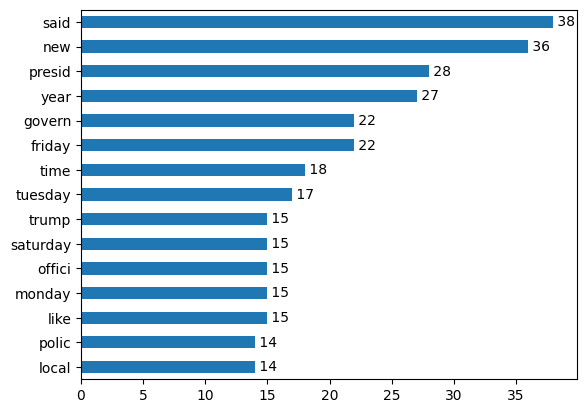

In [31]:
ax = word_freq[:15].sort_values(ascending=True).plot.barh()
for i in ax.containers:
    ax.bar_label(i, fmt=" %.0f")

In [32]:
# ax.con

## Ngram ????
## how many words makes one token
## Unigram, BiGrams

In [33]:
print(df_array[:5])

['nick kyrgio start brisban open titl defens battl victori american ryan harrison open round tuesday'
 'british polic confirm tuesday treat stab attack injur three peopl manchest victoria train station terrorist investig search address cheetham hill area citi'
 'marcellu wiley still fenc let young son play footbal former nfl defens end fox sport person tell podcaston sport like nfl tri make footbal safer game de'
 'still reckon fallout emmett till paint chasten artist reveal controversi chang even move forward new galleri show'
 'far arik ogunbowal coach muffet mcgraw concern notr dame victori louisvil thursday night anoth atlant coast confer game januari']


In [34]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

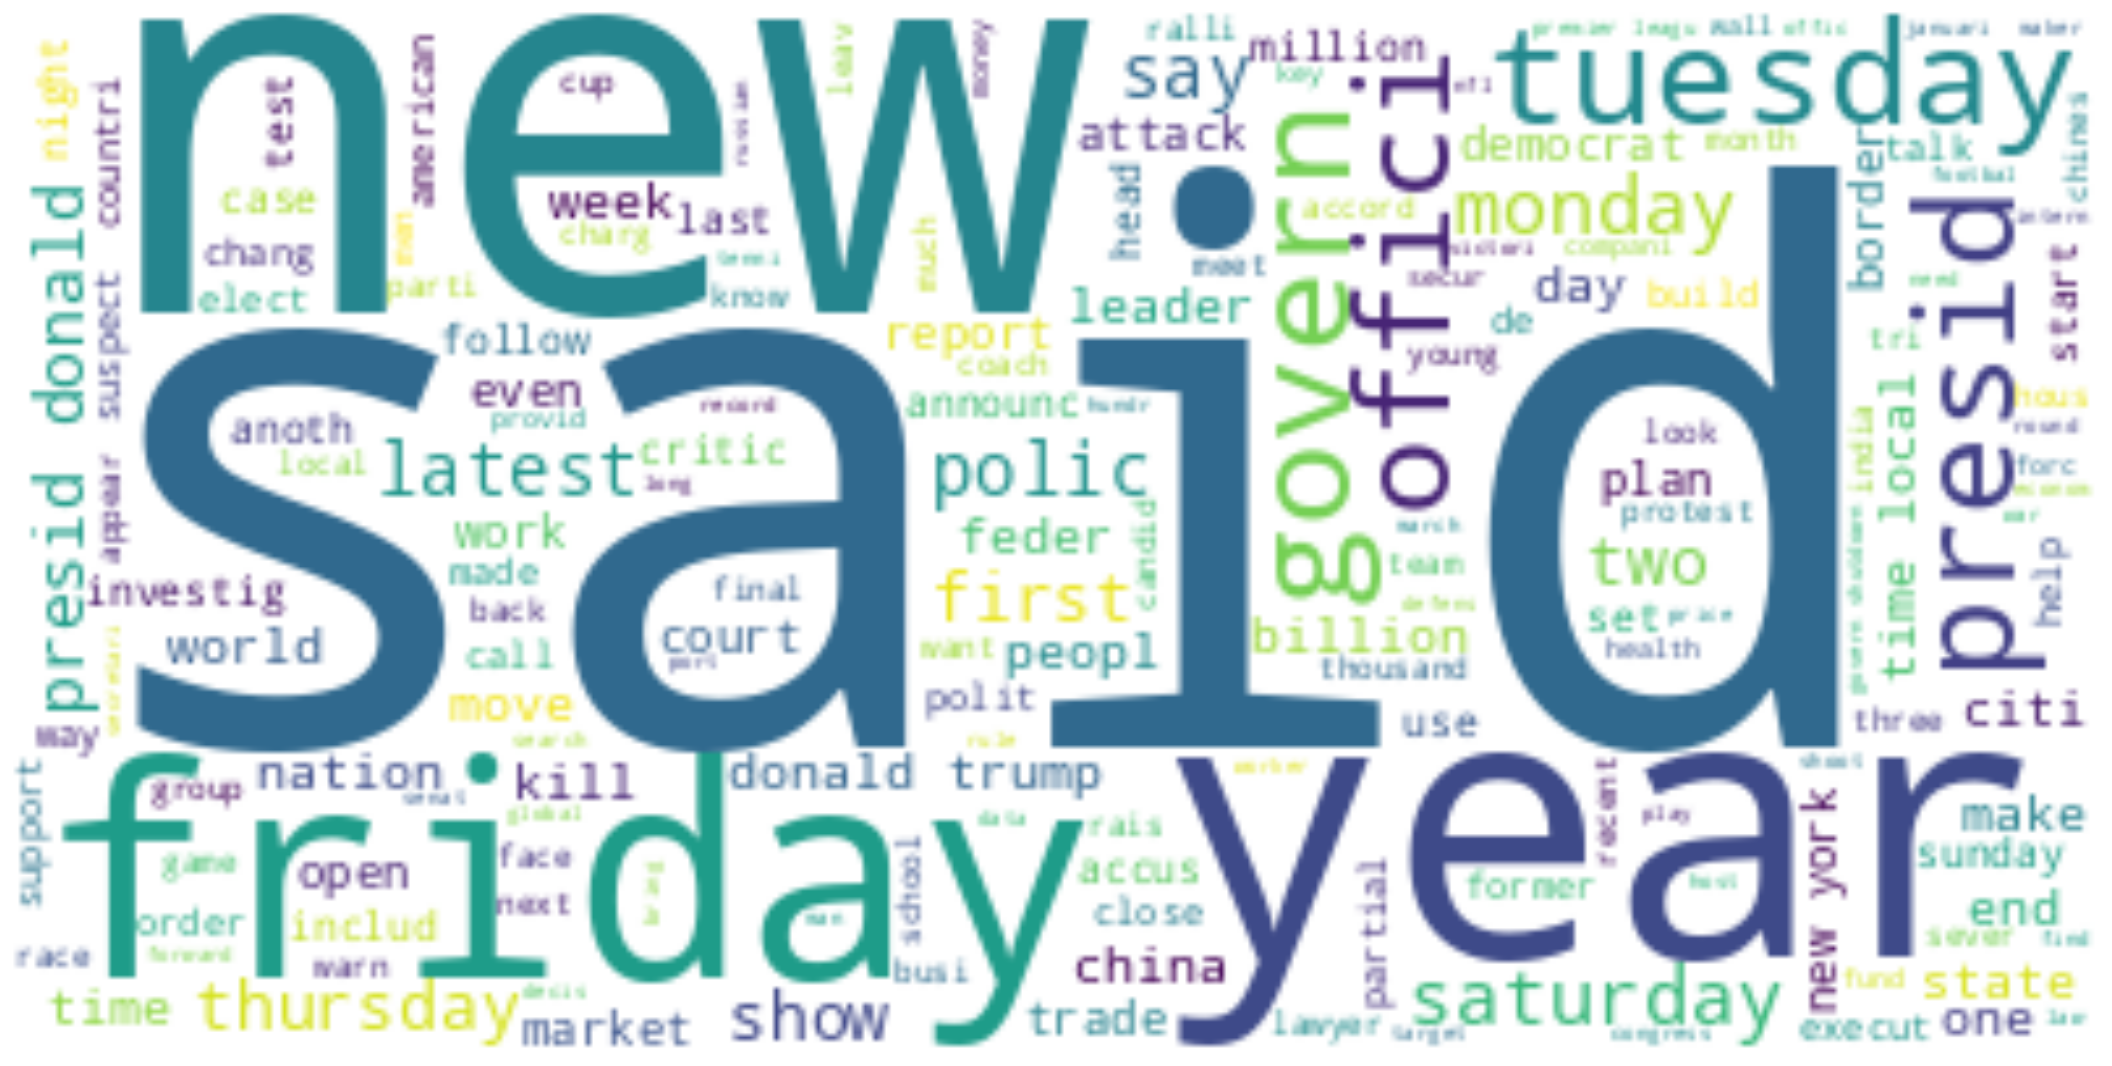

In [35]:
wordcloud = WordCloud(background_color="white")
wordcloud = wordcloud.generate(" ".join(df_array))
plt.figure(figsize= (27,20)) # Plot the cloud using matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# TF idf Notebook

In [36]:
### Gensim newLibrary

texts = [['human','humans' , 'interface', 'computer'], ['bad','cat','dog', 'dog']]
dct = gensim.corpora.Dictionary(texts)


In [37]:
print(dct.keys())

[0, 1, 2, 3, 4, 5, 6]


In [38]:
data_to_dict =  [sentence.split() for sentence in clean_data ]

In [39]:
# print(data_to_dict)

In [40]:
dictionary = gensim.corpora.Dictionary(data_to_dict)

In [41]:
list(dictionary.items())[:10]

[(0, 'american'),
 (1, 'battl'),
 (2, 'brisban'),
 (3, 'defens'),
 (4, 'harrison'),
 (5, 'kyrgio'),
 (6, 'nick'),
 (7, 'open'),
 (8, 'round'),
 (9, 'ryan')]

# iSlice ??

## Getting all the tokens

In [42]:
from itertools import islice

In [43]:
pd.Series(islice(dictionary.itervalues(), 10))

0    american
1       battl
2     brisban
3      defens
4    harrison
5      kyrgio
6        nick
7        open
8       round
9        ryan
dtype: object

In [44]:
# print(word_count)

## filter Extremes 

In [45]:
# list(dictionary.items())
dictionary.filter_extremes(no_below= 4 , keep_n=200 )

In [46]:
# list(dictionary.itervalues())

## Document to bog-of-words 

In [47]:
# print(clean_data)

In [48]:
# print(clean_data[:10])
a = (clean_data[0]).split()
# dictionary.doc2bow(a)
print(a)
# dictionary.doc2bow for doc in clean_data
bow_doc_1 = dictionary.doc2bow(a)


['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday']


In [49]:
dictionary[dictionary.doc2bow(a)[6][0]]

'victori'

In [50]:
for i in range(len(bow_doc_1)):
    print(f"TokenId:{bow_doc_1[i][0]} -- Word: {dictionary[bow_doc_1[i][0]]} -- Appeared: {bow_doc_1[i][1]} times")

TokenId:0 -- Word: american -- Appeared: 1 times
TokenId:1 -- Word: defens -- Appeared: 1 times
TokenId:2 -- Word: open -- Appeared: 2 times
TokenId:3 -- Word: round -- Appeared: 1 times
TokenId:4 -- Word: start -- Appeared: 1 times
TokenId:5 -- Word: tuesday -- Appeared: 1 times
TokenId:6 -- Word: victori -- Appeared: 1 times


## TFIdf ?? Term Frequency inverse Document frequency

In [51]:
#### Transforming each document to bag of words 
bow_corpus = [dictionary.doc2bow(doc.split()) for doc in clean_data]

In [52]:
# bow_corpus

In [53]:
#### Transform counts with TFIdfmodels ####3
############################Normalisation of a word

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [54]:
# list(corpus_tfidf)
# next(iter(corpus_tfidf))
next(iter(corpus_tfidf))

[(0, 0.3194209707990081),
 (1, 0.3548142980122043),
 (2, 0.6119301045883203),
 (3, 0.3548142980122043),
 (4, 0.30596505229416016),
 (5, 0.22851174819973308),
 (6, 0.3548142980122043)]

In [55]:
vowels = ["a", "e", "i", "o", "u"]
next(iter(vowels))

'a'

In [56]:
################################End of tfidf Notebook ##################################

In [57]:
#################### 

## TOPIC MODELLING NOTEBOOK 3

In [58]:
######## Making directories using Pathlib

## Making data and plot directory

In [59]:
# Path("data")

In [60]:
#### LDA MODELLING ##############

In [61]:
######## lATENT DERSHLET MODEL

## LDA MODELLING 

In [62]:
lda_model_tfidf = gensim.models.LdaMulticore(
    corpus= corpus_tfidf,
    num_topics= 5,
    id2word= dictionary,
    workers= 4,
    passes= 2  
)
lda_model_tfidf

In [63]:
# (lda_model_tfidf.print_topics())

In [64]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print(f"Topic: {idx} Word: {topic}")

Topic: 0 Word: 0.023*"said" + 0.023*"time" + 0.020*"latest" + 0.020*"local" + 0.016*"sunday" + 0.015*"health" + 0.013*"leader" + 0.013*"one" + 0.013*"minist" + 0.013*"presid"
Topic: 1 Word: 0.021*"said" + 0.020*"tuesday" + 0.018*"saturday" + 0.017*"offici" + 0.015*"first" + 0.015*"new" + 0.014*"investig" + 0.014*"two" + 0.014*"defend" + 0.014*"south"
Topic: 2 Word: 0.023*"new" + 0.021*"say" + 0.017*"look" + 0.016*"york" + 0.016*"premier" + 0.015*"move" + 0.015*"talk" + 0.014*"elect" + 0.014*"show" + 0.013*"meet"
Topic: 3 Word: 0.024*"young" + 0.020*"like" + 0.019*"help" + 0.016*"world" + 0.015*"accus" + 0.014*"show" + 0.014*"expect" + 0.013*"unit" + 0.012*"week" + 0.012*"school"
Topic: 4 Word: 0.022*"friday" + 0.021*"close" + 0.016*"night" + 0.015*"announc" + 0.015*"year" + 0.014*"point" + 0.014*"govern" + 0.014*"presid" + 0.014*"want" + 0.014*"work"


## Coherence Model

In [65]:
#### Calculate topic coherence
### Copmpute coherence Score using c_v
# print(clean_data)
df_text =  [ text.split() for text in clean_data]
# print(df_text)

coherence_model_lda = CoherenceModel(
    model= lda_model_tfidf,
    texts= df_text,
    dictionary= dictionary,
    coherence= "c_v"
)
coherence_lda = coherence_model_lda.get_coherence()

In [66]:
coherence_lda

0.5086400786716107

## How to select num_topics value ??


In [67]:
df_text =  [ text.split() for text in clean_data]

In [68]:
# coher_map = { }
# coher_map["a"] = 9

In [69]:
# coher_map

In [70]:
topic_range = range(2,40,1)
####  A function that makes a model and finds the coherence values
coher_map = { }
for num_topics in topic_range:
    ### make the model
    lda_model = gensim.models.LdaMulticore(
        corpus= corpus_tfidf, 
        num_topics= num_topics, 
        id2word= dictionary
    )
    coher_model = CoherenceModel(
        model= lda_model,
        texts= df_text,
        dictionary= dictionary,
        coherence= "c_v")
    coher_map[num_topics] =  coher_model.get_coherence()
    

In [75]:
# coher_map.keys()
# coher_map.values()

# a = zip(coher_map.keys(), coher_map.values())

# print(tuple(a)[1][1])

max_key = max(coher_map, key  = lambda x : coher_map[x])

coher_map[max_key]

0.5505115894386221

## Zip function

## Martin's method

In [93]:
listA = ["a", "b", "c","d"]

a,b = zip(*[ (text, 1] for text in listA]) 

In [91]:
########### I

(1, 1, 1, 1)